In [1]:
import pandas as pd
from wordcloud import WordCloud
import nltk as nl
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
%matplotlib inline  

## Leitura e tratamento de dados

In [2]:
df = pd.read_csv('solicitacoes.csv', sep=';', encoding="utf-8")

In [3]:
df['descricao'].describe()

count                                                  7019
unique                                                   39
top       Centro                                        ...
freq                                                   1337
Name: descricao, dtype: object

### Verificando dados:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7695 entries, 0 to 7694
Data columns (total 7 columns):
abertura            7695 non-null object
tipo                7695 non-null object
solicitacao         7695 non-null object
descricao           7019 non-null object
tipo_solicitacao    7695 non-null object
origem              7695 non-null object
situacao            7695 non-null object
dtypes: object(7)
memory usage: 420.9+ KB


### Verificando dados que possuem campo descrição como NaN

In [5]:
df[df['descricao'].isnull()]

,abertura,tipo,solicitacao,descricao,tipo_solicitacao,origem,situacao
7,2015-10-06,Maus tratos a animais,"Cidadã alega que no endereço; Rua São Jorge, n...",NaN,Reclamação,Presencial,Fechado
9,2015-10-06,Poda e Retirada de Árvore,PODA DE ÁRVORE NO ENDEREÇO; RUA VEREADOR CELSO...,NaN,Solicitação de Serviço,Presencial,Fechado
12,2015-10-07,Rua esburacada,"Cidadã alega que no endereço; Rua 4, Bairro; L...",NaN,Solicitação de Serviço,Presencial,Fechado
14,2015-10-07,Obra irregular,Cidadão reivindica referente no endereço; Rua ...,NaN,Reclamação,Presencial,Fechado
17,2015-10-08,Entulho na calçada/ Via pública,Solicita a retirada de entulhos no endereço; A...,NaN,Solicitação de Serviço,Presencial,Fechado
18,2015-10-13,Ocupação Irregular de Área Púlica,A Sra. denuncia que há um muro construído de f...,NaN,Denuncia,Presencial,Fechado
20,2015-10-13,Poda e Retirada de Árvore,A solicitante pede que seja feita a poda da ár...,NaN,Solicitação de Serviço,Presencial,Fechado
22,2015-10-13,Terreno baldio,Cidadã reivindica referente atrás do endereço;...,NaN,Reclamação,Presencial,Fechado
25,2015-10-14,Terreno baldio,CIDADÃO REIVINDICA REFERENTE NO ENDEREÇO; AV I...,NaN,Reclamação,Telefone,Fechado
26,2015-10-14,Não cumprimento de itinerários,CIDADÃ REIVINDICA REFERENTE OS ONIBUS DA EMPRE...,NaN,Reclamação,Telefone,Fechado


### Retirando esses dados

In [6]:
df = df[df['descricao'].notnull()]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7019 entries, 0 to 7694
Data columns (total 7 columns):
abertura            7019 non-null object
tipo                7019 non-null object
solicitacao         7019 non-null object
descricao           7019 non-null object
tipo_solicitacao    7019 non-null object
origem              7019 non-null object
situacao            7019 non-null object
dtypes: object(7)
memory usage: 438.7+ KB


### Setando o texto das solicitações para minúsculo

In [8]:
df['solicitacoes'] = df.solicitacao.str.lower()
del df['solicitacao']

## Análise dos problemas da cidade a partir do texto das solicitações

### Transformando texto em vetor de palavras

In [9]:
words = []
for p in df.solicitacoes.apply(lambda sol: sol.split(" ")):
    for w in p:
         words.append(w)
words = pd.Series(words)
words.head()

0         obra
1    irregular
2         esta
3        sendo
4    executada
dtype: object

### Removendo stop words

In [10]:
filtered_words = [word for word in words if word not in stopwords.words('portuguese')]

In [11]:
for word in filtered_words[0:10]:
    print(word)

obra
irregular
sendo
executada
rua
alziro
zarur
n°554.
obra
projeto,


### Frequência de cada palavra no texto - StopWords, utilizando o NLTK

In [12]:
freq = nl.FreqDist(filtered_words)

In [13]:
freq.most_common(100)

[(u'rua', 5754),
 (u'', 4081),
 (u'cidad\xe3', 2651),
 (u'cidad\xe3o', 2404),
 (u'solicita', 2161),
 (u'pede', 1593),
 (u'n\xba', 1564),
 (u'frente', 1359),
 (u'endere\xe7o;', 1303),
 (u'bairro', 1199),
 (u'denuncia', 1176),
 (u'\xe9', 1111),
 (u'pois', 967),
 (u'lampada', 823),
 (u'esquina', 801),
 (u'bairro;', 783),
 (u'\xe1gua', 747),
 (u'alega', 691),
 (u'bairro:', 676),
 (u'segundo', 649),
 (u'casa', 646),
 (u'lado', 612),
 (u'existe', 586),
 (u'tr\xeas', 573),
 (u'fiscaliza\xe7\xe3o', 561),
 (u'pr\xf3ximo', 546),
 (u'troca', 530),
 (u'reposi\xe7\xe3o', 507),
 (u'poda', 493),
 (u'ilumina\xe7\xe3o', 444),
 (u'n\xfamero', 442),
 (u'pedido', 438),
 (u'av.', 438),
 (u'lixo', 424),
 (u'limpeza', 423),
 (u'terreno', 411),
 (u'devido', 410),
 (u'av', 396),
 (u'local', 380),
 (u'mesma', 352),
 (u'fragata', 343),
 (u'moradores', 324),
 (u'arvore', 312),
 (u'esgoto', 300),
 (u'moradora', 292),
 (u'santa', 288),
 (u'cal\xe7ada', 287),
 (u'dia', 287),
 (u'fica', 286),
 (u'areal', 281),
 (u'ur

### Ao analizar as 100 palavras com maior frequência, é perceptivel que palavras pequenas não dizem muito sobre o contexto. Ex: ser, ter, -, dia, av., av.

### A solução encontrada para esse obstáculo foi utilzar análizar o contexto pela frequência mas com um tamanho mínimo de palavra.

In [14]:
words_f = [w for w in set(filtered_words) if len(w) > 3 and freq[w] > 200]

### WORDCLOUD das palavras mais utilizadas, obs: o tamanho da palavra na figura não quer dizer que a mesma é mais frequente

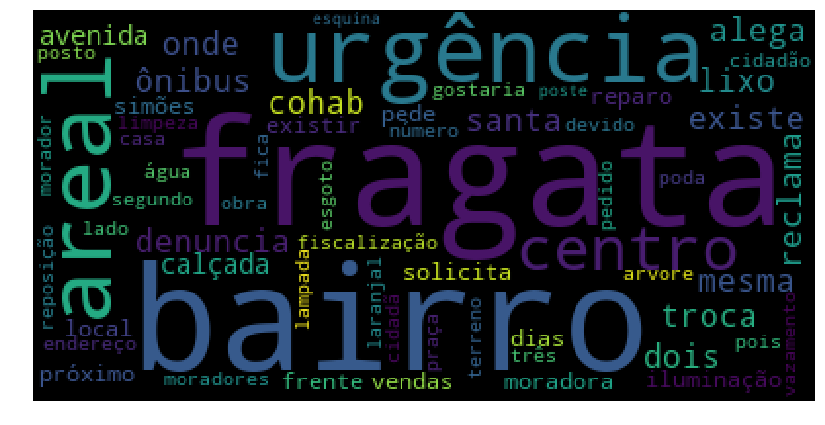

In [15]:
wordcloud = WordCloud(relative_scaling = 1.0).generate(' '.join(words_f))
plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Gráfico com as palavras mais comuns no texto e quantas repetições foram encontradas na mesma

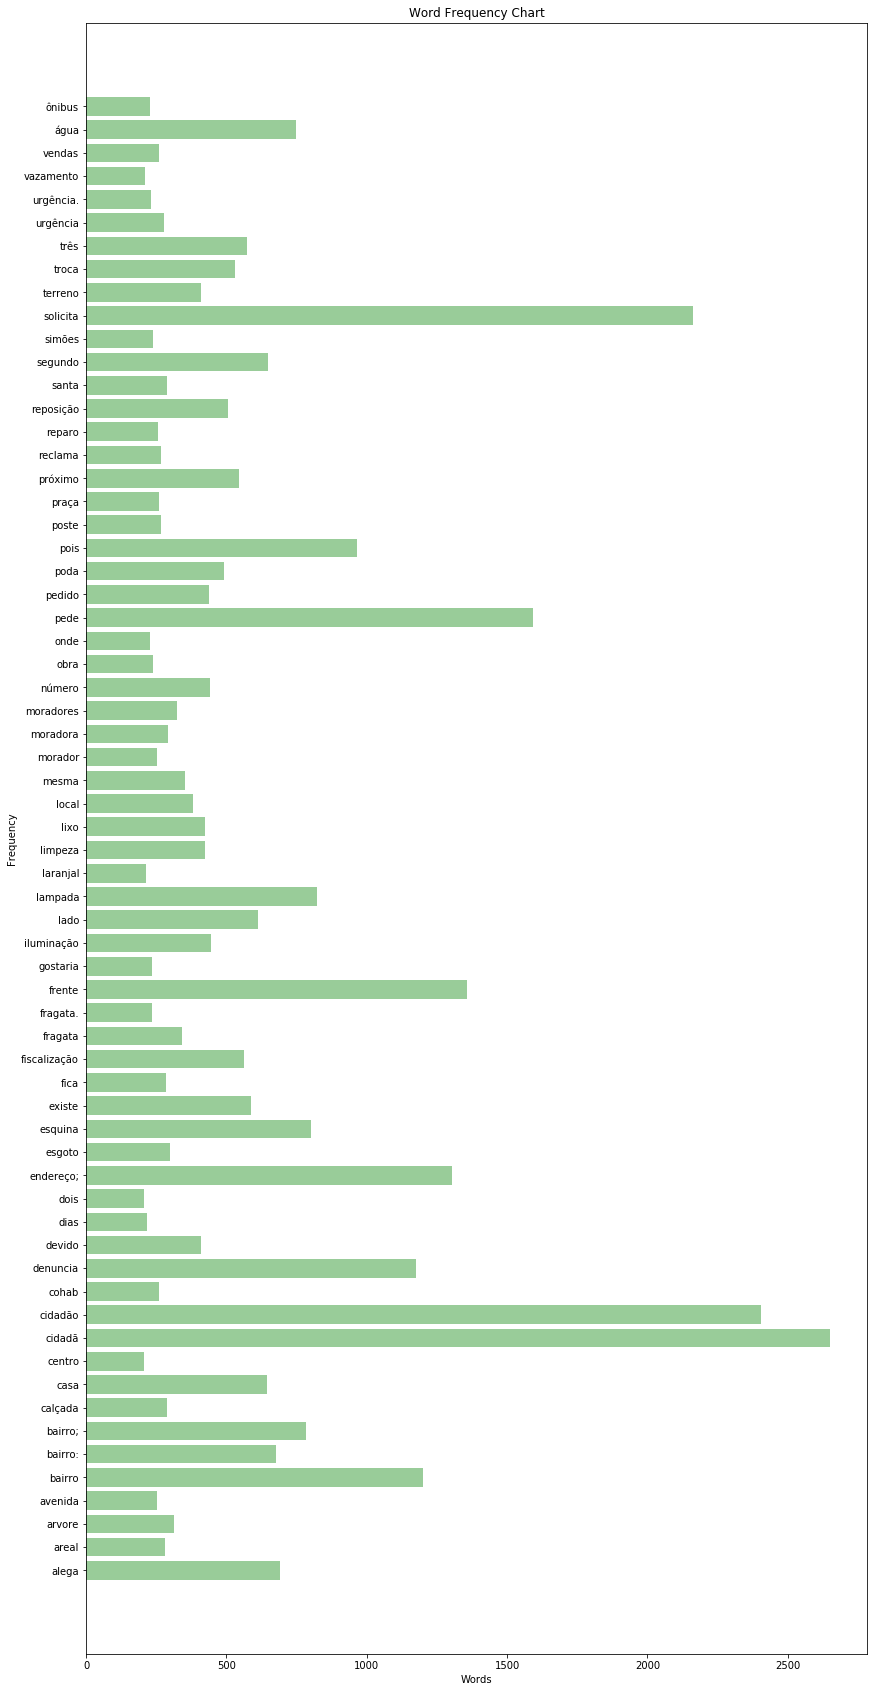

In [16]:
words = [x[0] for x in freq.most_common(75) if(len(x[0]) > 3) and freq[x[0]] > 200]
values = [int(x[1]) for x in freq.most_common(75) if(len(x[0]) > 3) and freq[x[0]] > 200]
plt.figure(figsize=(14, 30))
mybar = plt.barh(words, values, color='green', alpha=0.4)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Chart')
plt.show()

## Unificamos as palavras mais frequêntes com o seu possível contexto, assim dando uma melhor ideia do tipo de problemas enfrentados na cidade.

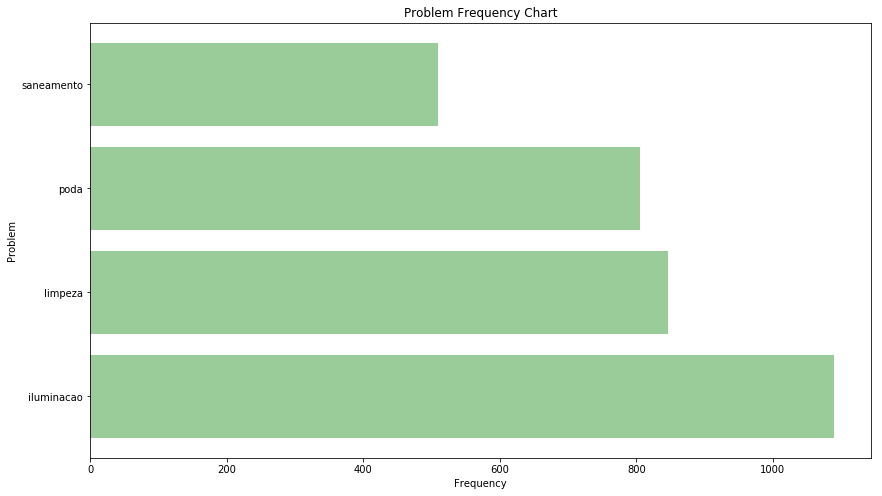

In [17]:
problems = ['limpeza', 'poda', 'saneamento', 'iluminacao']
counts = [freq['limpeza'] + freq['lixo'], freq['poda']+freq['arvore'],
          freq['água'] + freq['esgoto'] + freq['vazamento'],
          freq['iluminação'] + freq['lampada'] + freq['poste']]
plt.figure(figsize=(14, 8))
mybar = plt.barh(problems, counts, color='green', alpha=0.4)
plt.xlabel('Frequency')
plt.ylabel('Problem')
plt.title('Problem Frequency Chart')
plt.show()

## RESULTADO
### Na lista das palavras mais frequentes, é possivel verificar a presença de bairros, assim podendo relaciona-los com um grande número de ocorrências. São eles: Centro, Fragata, Laranjal Areal e Três Vendas.

### Os problemas mais comuns apontados pelo estudo são de limpeza (relacionados a palavra limpeza, lixo), poda ( relacionados as palavras poda e árvore), sanêamento ( relacionados as palavras água, esgoto e vazamênto) e iluminação (relacionados as palavras iluminação, lampada e poste).

### Lugares que devem ter atenção além da descrição e bairros (praças, terrenos e ônibus)

## Abaixo tentamos confirmar os dados retirados da descrição, utilizando outros campos

### Validação dos dados retirados a partir da solicitação:

In [18]:
df.tipo.value_counts()[0:10]

Iluminação Pública Irregular     1572
Poda e Retirada de Árvore         554
Limpeza Urbana                    316
Foco de Dengue                    315
Rivindicação Ouvidoria            295
Terreno baldio                    291
Obra irregular                    269
Buraco na via NÃO pavimentada     209
Vazamento de água potável         188
Buraco na via pavimentada         165
Name: tipo, dtype: int64

In [19]:
df.descricao.value_counts()[0:5]

Centro                                                                                                  1337
Fragata                                                                                                 1187
Três Vendas                                                                                              990
Areal                                                                                                    934
Laranjal                                                                                                 483
Name: descricao, dtype: int64

## Resultados finais da análise dos dados a partir da descrição da solicitação:
### A partir dos dados das solicitações, foi possível a reconstrução e verificação de outros dados informados pela prefeitura.